In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Train_Data.csv')
data

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


### Basic Checks(Statistical information about the data)

In [7]:
data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3630.0,38.887036,12.151029,18.0000,29.000000,39.170922,48.343281,64.00000
bmi,3630.0,30.629652,5.441307,15.9600,26.694526,30.200000,34.100000,53.13000
children,3630.0,2.503581,1.712568,0.0000,1.000000,3.000000,4.000000,5.00000
charges,3630.0,12784.808644,10746.166743,1121.8739,5654.818262,9443.807222,14680.407505,63770.42801


In [9]:
data.tail() 

,age,sex,bmi,smoker,region,children,charges
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452
3629,37.598865,female,25.219233,no,northeast,3,7027.698968


### Checking For the duplicates

In [10]:
data.duplicated().sum()

679

In [11]:
data.shape

(3630, 7)

In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

In [13]:
# Checking any missing vaalue present in the data or not
data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

               age          bmi     children       charges
count  3630.000000  3630.000000  3630.000000   3630.000000
mean     38.887036    30.629652     2.503581  12784.808644
std      12.151029     5.441307     1.712568  10746.166743
min      18.000000    15.960000     0.000000   1121.873900
25%      29.000000    26.694526     1.000000   5654.818262
50%      39.170922    30.200000     3.000000   9443.807222
75%      48.343281    34.100000     4.000000  14680.407505
max      64.000000    53.130000     5.000000  63770.428010


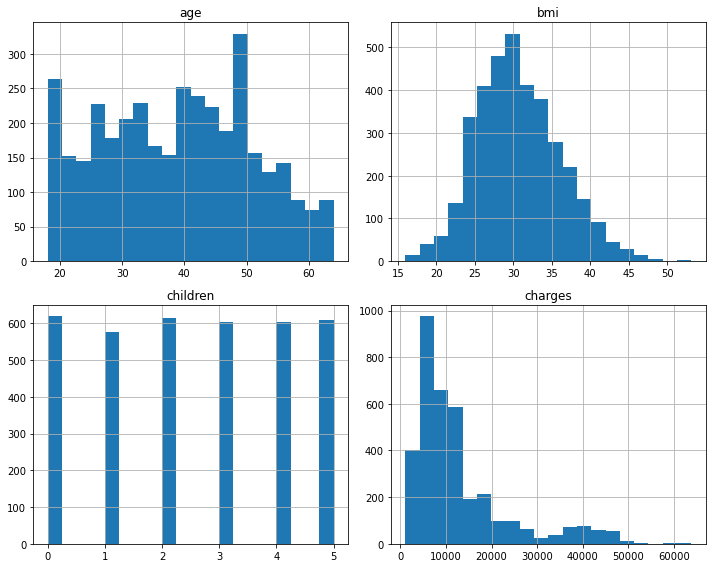

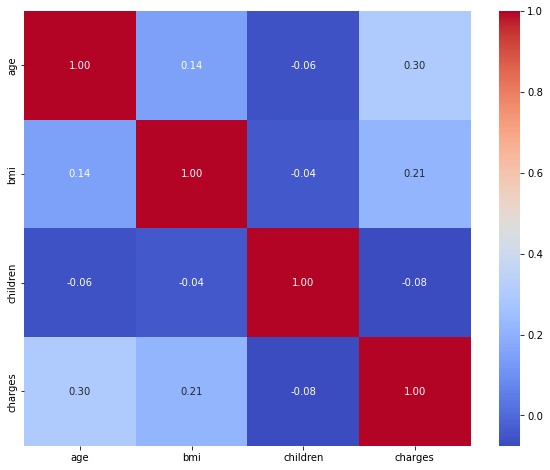

In [14]:
# Checking all Numerical columns are how the distributed 
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Summary statistics
print(data[numerical_columns].describe())

# Histograms
data[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

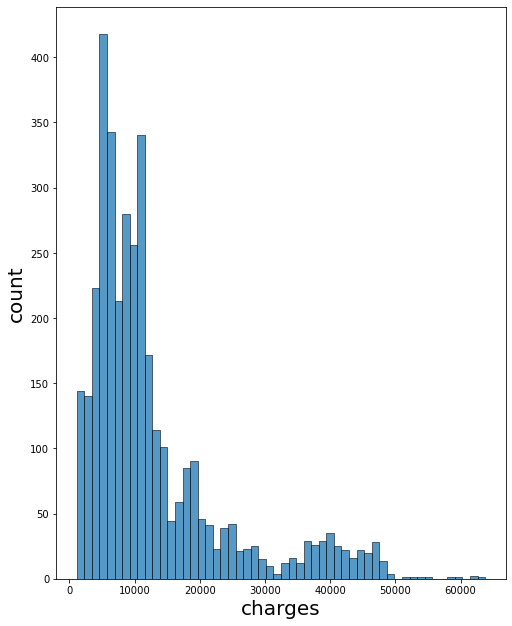

In [15]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber >=7:
        ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column, fontsize=20)
    plt.ylabel('count', fontsize=20)
    plotnumber += 1
plt.tight_layout()

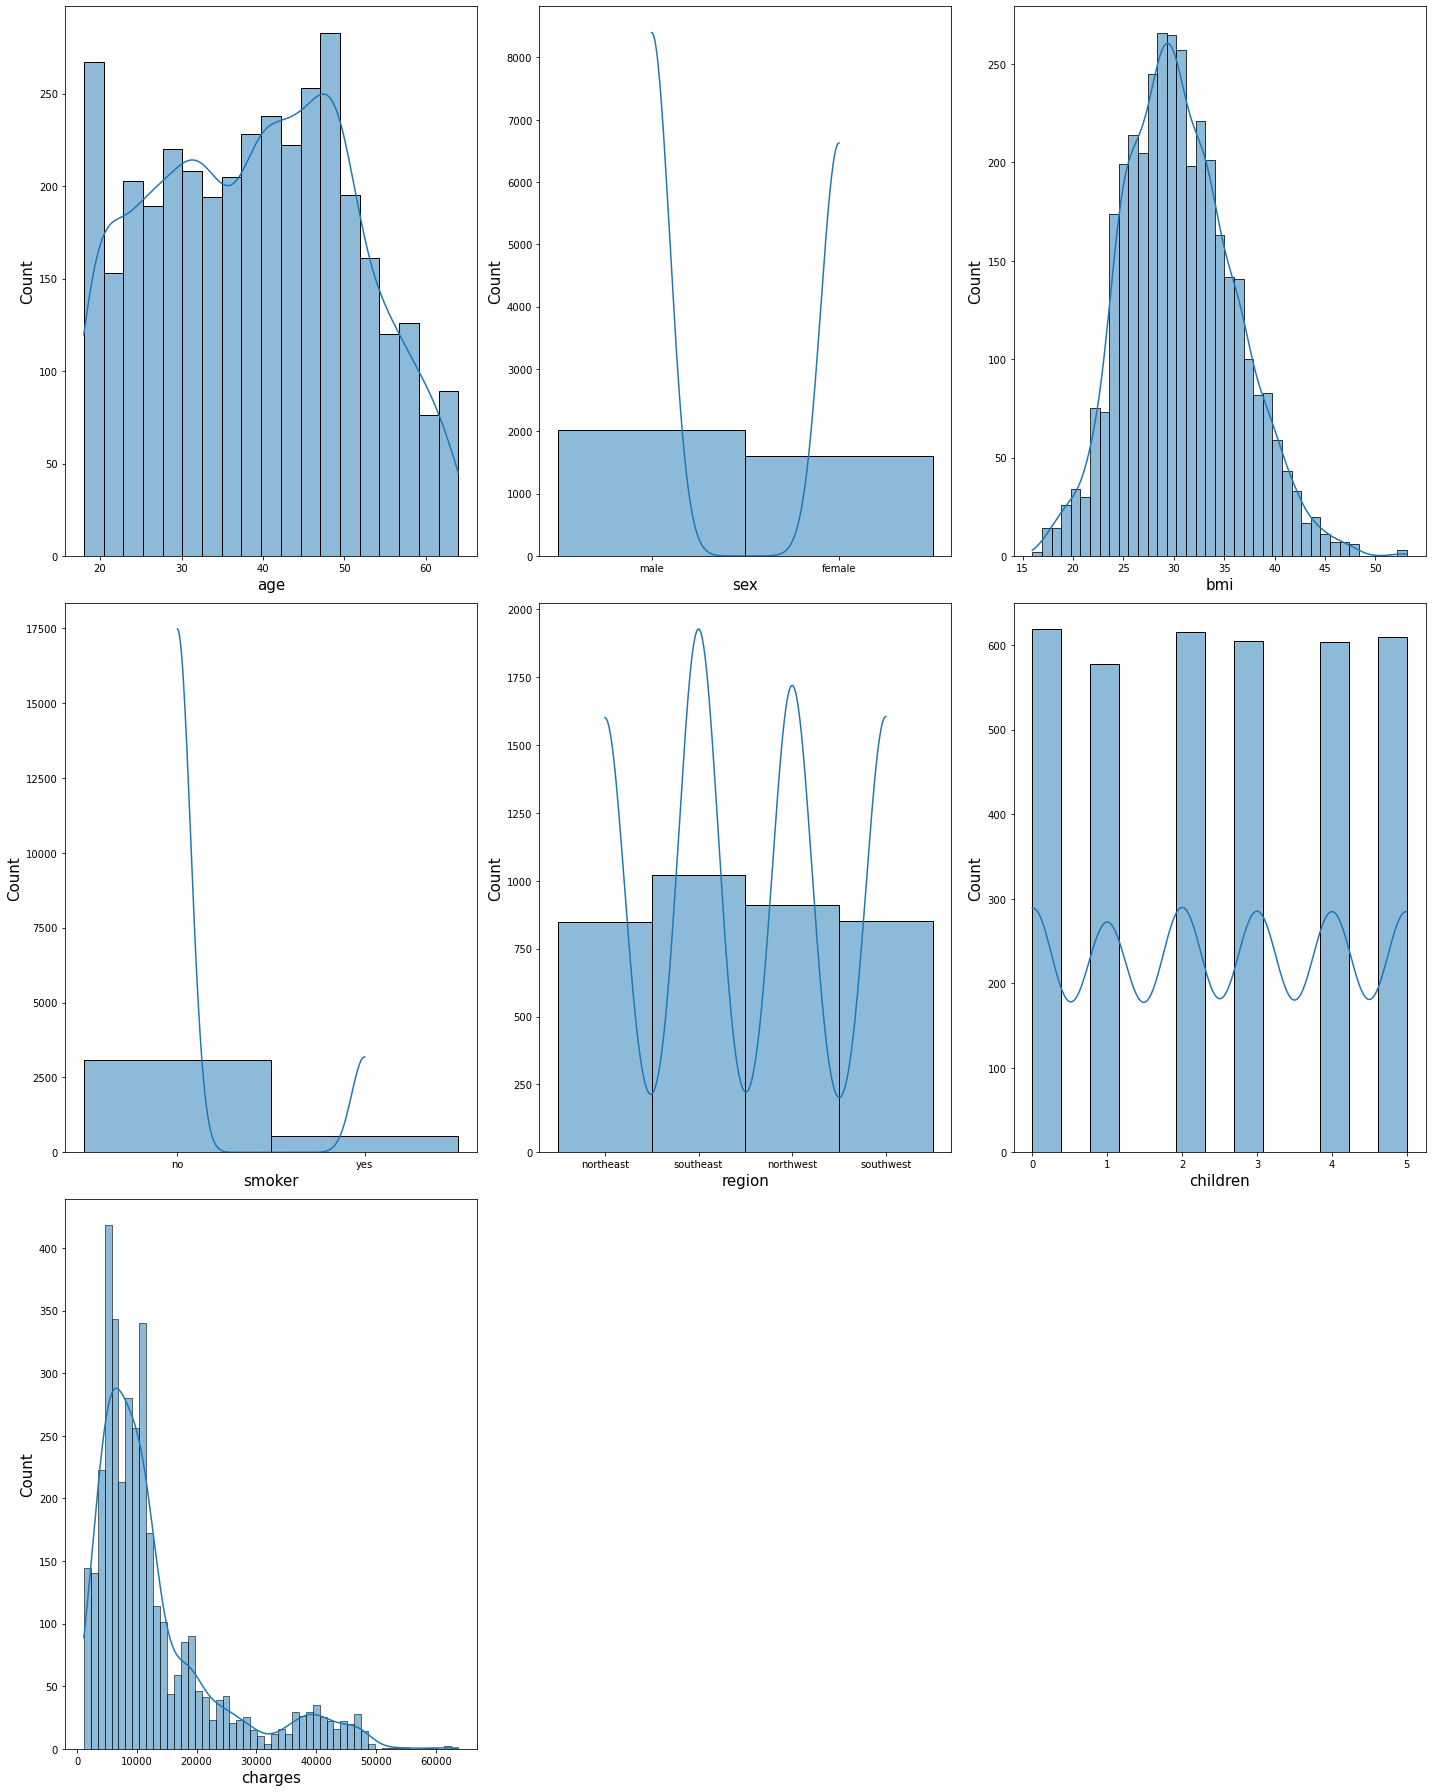

In [16]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1
for column in data:  # Assuming 'data' is your DataFrame
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column],kde=True,ax=ax)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plotnumber += 1
plt.tight_layout()
plt.show()

### Convert categorical data into numerical data

In [17]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [18]:
data_copy

,age,sex,bmi,smoker,region,children,charges
0,21.000000,0,25.745000,0,1,2,3279.868550
1,36.976978,1,25.744165,1,2,3,21454.494239
2,18.000000,0,30.030000,0,2,1,1720.353700
3,37.000000,0,30.676891,0,1,3,6801.437542
4,58.000000,0,32.010000,0,2,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,1,41.426984,0,0,4,10987.324964
3626,38.661977,1,26.202557,0,2,2,11735.844352
3627,56.000000,0,40.300000,0,3,0,10602.385000
3628,48.061207,1,34.930624,0,2,1,8976.140452


### Checking Outliers in data by using Box plot

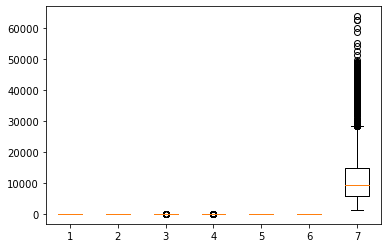

<Figure size 720x720 with 0 Axes>

In [19]:
plt.boxplot(data_copy)
fig = plt.figure(figsize =(10, 10))
plt.show()

There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very less.

### Plotting skewness and kurtosis in data

In [20]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.049 and  Kurtosis -0.980
sex : Skewness 0.238 and  Kurtosis -1.945
bmi : Skewness 0.353 and  Kurtosis 0.070
smoker : Skewness 1.915 and  Kurtosis 1.669
region : Skewness -0.034 and  Kurtosis -1.329
children : Skewness -0.009 and  Kurtosis -1.268
charges : Skewness 1.775 and  Kurtosis 2.695


If the skewness is between -0.5 and 0.5, the distribution is considered approximately symmetric and data normally distributed
kurtosis greater than 0 indicates heavier tails than a normal distribution, while excess kurtosis less than 0 indicates lighter tails. As we see above values our data is perfectly symmetrical distribution.

### Check Correlation in between independent features and target column 

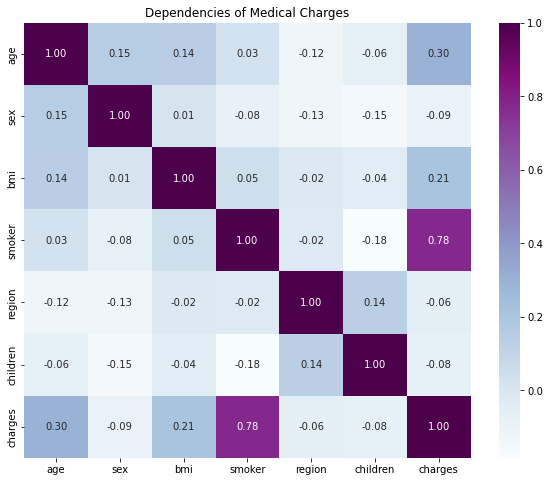

In [21]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

### Smoker, BMI and Age columns are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

### Before processing we have to scale the data for BMI and Charges columns

In [22]:
# We use standardization tech
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

# Assuming 'data' is your DataFrame and you want to scale columns 'column1' and 'column2'
columns_to_scale = ['age','bmi', 'charges']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
data_pre[columns_to_scale] = scaler.fit_transform(data_pre[columns_to_scale])

In [23]:
data_pre

,age,sex,bmi,smoker,region,children,charges
0,-1.472262,0,-0.897822,0,1,2,-0.884618
1,-0.157215,1,-0.897976,1,2,3,0.806881
2,-1.719189,0,-0.110219,0,2,1,-1.029761
3,-0.155320,0,0.008683,0,1,3,-0.556868
4,1.573167,0,0.253714,0,2,1,-0.078009
...,...,...,...,...,...,...,...
3625,0.817634,1,1.984600,0,0,4,-0.167290
3626,-0.018524,1,-0.813721,0,2,2,-0.097626
3627,1.408549,0,1.777455,0,3,0,-0.203117
3628,0.755116,1,0.790539,0,2,1,-0.354470


In [24]:
data_pre.head()

,age,sex,bmi,smoker,region,children,charges
0,-1.472262,0,-0.897822,0,1,2,-0.884618
1,-0.157215,1,-0.897976,1,2,3,0.806881
2,-1.719189,0,-0.110219,0,2,1,-1.029761
3,-0.155320,0,0.008683,0,1,3,-0.556868
4,1.573167,0,0.253714,0,2,1,-0.078009


In [25]:
# Create X
X=data_pre.drop(labels=['charges'], axis=1)
X

,age,sex,bmi,smoker,region,children
0,-1.472262,0,-0.897822,0,1,2
1,-0.157215,1,-0.897976,1,2,3
2,-1.719189,0,-0.110219,0,2,1
3,-0.155320,0,0.008683,0,1,3
4,1.573167,0,0.253714,0,2,1
...,...,...,...,...,...,...
3625,0.817634,1,1.984600,0,0,4
3626,-0.018524,1,-0.813721,0,2,2
3627,1.408549,0,1.777455,0,3,0
3628,0.755116,1,0.790539,0,2,1


In [26]:
#Create y
# Defing Target variable or dependent variable
y = data_pre.iloc[:,-1]

In [27]:
y

0      -0.884618
1       0.806881
2      -1.029761
3      -0.556868
4      -0.078009
          ...   
3625   -0.167290
3626   -0.097626
3627   -0.203117
3628   -0.354470
3629   -0.535810
Name: charges, Length: 3630, dtype: float64

### Model Creation

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (2904, 6)
Size of y_train :  (2904,)
Size of X_test :  (726, 6)
Size of Y_test :  (726,)


### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [30]:

%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 106 ms


LinearRegression()

In [31]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.711
R2_score (train) : 0.712
R2_score (test) : 0.718
RMSE : 0.531


### Support Vector Machine Regression

In [32]:
# Initialize the Support Vector Regression (SVR) model
svm_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used

# Train the SVR model
svm_model.fit(X_train_scaled, y_train)

# Predict insurance premiums or claim amounts for the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R2 Score:',r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

NameError: name 'SVR' is not defined

In [33]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7177677703827693
0.2816585628339597


In [34]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-3.6374026398222625e-05
0.9980036945885473


### Random Forest 

In [35]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Scores:
print('R2 Score:',r2_score(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score: 0.9045990306915666
Mean Squared Error: 0.09520705677314889
Root Mean Squared Error (RMSE): 0.308556407765499


In [71]:
# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))